In contrast to supervised machine learning, unsupervised learning is used when there is no "ground truth" form which to train and validate label predictions. The most common form of unsupervised learining is clustering, which is simillar conceptually to classification, except that the trianing data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values.

In [1]:
import pandas as pd

data = pd.read_csv('data/seeds.csv')
feats = data[data.columns[0:6]]
feats.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
72,17.26,15.73,0.8763,5.978,3.594,4.539
161,12.02,13.33,0.8503,5.350,2.810,4.271
39,14.28,14.17,0.8944,5.397,3.298,6.685
113,19.14,16.61,0.8722,6.259,3.737,6.682
151,12.01,13.52,0.8249,5.405,2.776,6.992
138,15.60,15.11,0.8580,5.832,3.286,2.725
11,14.03,14.16,0.8796,5.438,3.201,1.717
26,13.02,13.76,0.8641,5.395,3.026,3.373
196,12.79,13.53,0.8786,5.224,3.054,5.483
141,13.32,13.94,0.8613,5.541,3.073,7.035


To visualize in a three-dimensional world, or on a two-dimensional plot, we'll take advantage of a mathematical technique called Principal Component Analysis (PCA) to analyze the relationships between the features and summarize each observation as coordinates for 2 principal components.

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# normalize the numeric features so they're on the same scale
scaled_feats = MinMaxScaler().fit_transform(feats[feats.columns[0:6]])

# get two principal components
pca = PCA(n_components=2).fit(scaled_feats)
feats_2d = pca.transform(scaled_feats)
feats_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

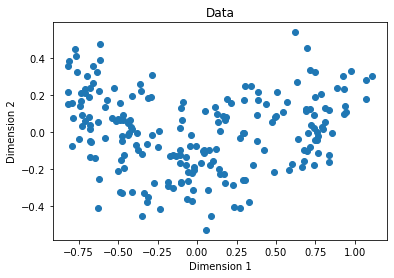

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(feats_2d[:,0], feats_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

One way to find out how many clusters to separate data into is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. 

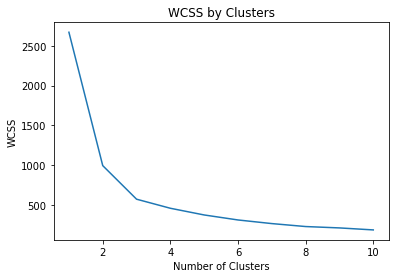

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    # fit the data points
    kmeans.fit(feats.values)
    # get the wcss (inertia) value
    wcss.append(kmeans.inertia_)

# plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

After a noticable reduction from 2 to 3 clusters, the reduction is less pronounced, resulting in an "elbow" in the chart at around 3 clusters, indicating that 3 are reasonably well separated clusters of data points.

# K-Means Clustering

The basic algorithm of K-Means has the following steps:
1. A set of K centroids are randomly chosen.
2. Clusters are formed by assigning the data points to their closest centroid.
3. The means of each cluster is computed and the centroid is moved to the mean.
4. Steps 2 and 3 are repeated until a stopping criteria is met. Typically, the algorithm terminates when each new iteration results in negligable movement of centroids and the clusters become static.
5. When the clusters stop changing, the algorithm has converged, defining the locations of the clusters - note that the random starting point for the centroids means that re-running the algorithm could result in slightly different clusters, so training usually involves multiple iterations, reinitializing the centroids each time, and the model with the best WCSS is selected.

In [5]:
# create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

# fit to the data and predict the cluster assignments for each data
km_clusters = model.fit_predict(feats.values)
# view the cluster assignments
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

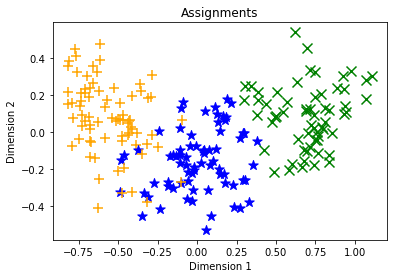

In [6]:
# see those cluster assignments with the 2-dimensional data points
def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    mrk_dic = {0:'*', 1:'x', 2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(feats_2d, km_clusters)

What's the practical use of clustering?
1. In some cases, u may have data that u need to group into distinct clusters without knowing how many clusters there are or what they indicate. Then to investigate how those segments exhibit something different.
2. Sometimes, clustering is used as an initial step towards creating a classification model. 

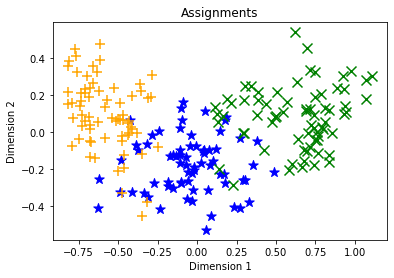

In [7]:
actual_species = data[data.columns[7]]
plot_clusters(feats_2d, actual_species.values)

# Hierarchical Clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so.

Hierarchical clustering creates clusters by either a divisive method or agglomerative method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a "bottom up" approach. Agglomerative clustering roughly works as follows:
1. The linkage distances between each of the data points is computed
2. Points are clustered pairwise with their nearest neighbor
3. Linkage distances between the clusters are computed.
4. Clusters are combined pairwise into larger clusters.
5. Steps 3 and 4 are repeated until all data points are in a single cluster.

The linkage funtion can be computeed in a number of ways:
* Ward linkage measures the increase in variance for the clusters being linked
* Average linkage uses the mean pairwise distance between the members of the 2 clusters
* Complete or Maximal linkage uses the maximum distance between the members of the 2 clusters

Several different distance metrics are used to compute linkage functions:
* Euclidian or I2 distance is the most widely used. This metric is only choice for the Ward linkage method.
* Manhattan or I1 distance is robust to outliers and has other interesting properties.
* Cosine similarity, is the dot product between the location vectors divided by the magintudes of the vectors. Notice that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents. 

### Agglomerative Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(feats.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

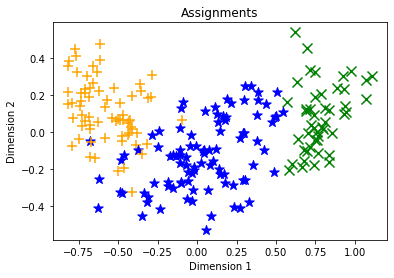

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    mrk_dic = {0:'*', 1:'x', 2: '+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker = markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(feats_2d, agg_clusters)